#### Importing Necessary Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

#### Getting the Data

In [2]:
files = os.listdir('./Sales_Data')

df = pd.DataFrame()

for file in files:
    data = pd.read_csv("./Sales_Data/"+ file)
    df = pd.concat([df,data])
    
df.to_csv("all_data.csv", index= False)    
    

#### Reading the Data File

In [3]:
df = pd.read_csv("all_data.csv")

In [4]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Understanding the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
# We have 186850-186305 = 545 Empty rows

In [7]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [8]:
#The Store has 20 different Products
#The Difference between Order ID count & Unique Order ID tells us that some order ID consists of more items.

## Data Cleaning

In [9]:
# To Check if dataframe has empty values

df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Dropping all rows having all values as NaN

df = df.dropna(axis=0, how="all")

In [11]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [12]:
# Removing rows that are having "Order date" as value in Order Date Column

df = df[df["Order Date"]!="Order Date"]

In [13]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Transforming the Data into Desired Datatypes

In [14]:
type(df["Quantity Ordered"][2])

str

In [15]:
type(df["Order Date"][5])

str

In [16]:
# changing Datatype of Quantity Ordered to Integer

df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Changing datatype of Price Each

df["Price Each"] = pd.to_numeric(df["Price Each"])

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# changing Datatype of Order Date to Datetime 

df["Order Date"] = pd.to_datetime(df["Order Date"])

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# Adding new Month Column

df["Month"] = df["Order Date"].dt.month

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# Adding Hour Column

df["Hour"] = df["Order Date"].dt.hour

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df["City"] = df["Purchase Address"].apply(lambda x: x.split(", ")[1] + " (" +  x.split(", ")[2][0:2]+ ")")

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17,379.99,San Francisco (CA)


## Exploratory Data Analysis

### Business Question 1. Which month had the highest number of sales?

In [26]:
month_data = df.groupby("Month").sum()
month_data.reset_index(inplace = True)

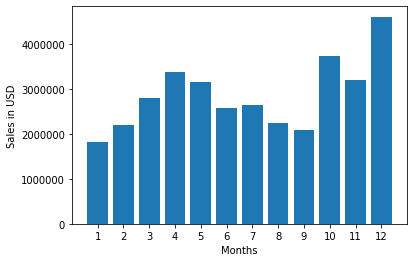

In [27]:
plt.bar(month_data["Month"], month_data["Sales"] )
plt.xticks(month_data["Month"])
plt.xlabel("Months")
plt.ylabel('Sales in USD')
plt.show()

In [28]:
# From the Graph we can see that December had the Highest Number of sales.
# This may be for the fact that Christmas is celebrated in December and people tend to buy more.

### Business Question 2. Which City had the highest number of sales

In [29]:
city_data = df.groupby("City").sum()
city_data

,Quantity Ordered,Price Each,Month,Hour,Sales
City,,,,,
Atlanta (GA),16602,2.779908e+06,104794,214264,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,141946,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,288225,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,214390,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,427444,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,357696,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,35211,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,144421,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,643265,8.262204e+06


In [30]:
city_data.reset_index(inplace= True)

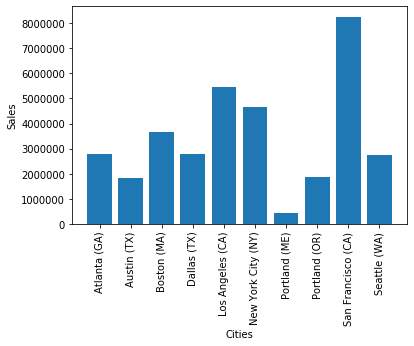

In [31]:
plt.bar(city_data["City"], city_data["Sales"])
plt.xticks(city_data["City"], rotation = "vertical")
plt.xlabel("Cities")
plt.ylabel("Sales")
plt.show()

In [32]:
# San Francisco has the highest number of sales. 
# This may be because San Francisco lies in Silicon valley and electronic items demand might be high in that area. 

### Business Question 3. At what time should we display advertisements to maximize the customer likehood of buying the product

In [33]:
Hourly_data = df.groupby("Hour").count()
Hourly_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [34]:
Hourly_data.reset_index(inplace = True)

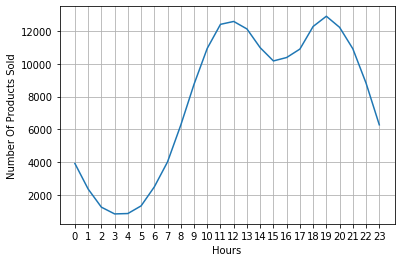

In [35]:
plt.plot(Hourly_data["Hour"], Hourly_data["Sales"])
plt.xticks(Hourly_data["Hour"])
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Number Of Products Sold")
plt.show()


In [36]:
# from the graph we can see that, maximun number of customers are buying products at around 11 am to 12 pm & at 19:00
# So for max benefits, we should advertise our products in that time.

### Business Question 4. What products are most often sold together?

In [37]:
# making a dataframe with only duplicated Order ID

new_df = df[df["Order ID"].duplicated(keep = False)]

In [38]:
new_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Sales,City
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,Los Angeles (CA)
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,19,600.00,Los Angeles (CA)
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,19,11.95,Los Angeles (CA)
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,11,99.99,Boston (MA)
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,20,3.84,Atlanta (GA)
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,0,11.99,Atlanta (GA)
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,0,5.98,Atlanta (GA)
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,13,600.00,San Francisco (CA)


In [39]:
# Grouping together Products with same Order Id 

new_df["Grouped"] = new_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
# Removing duplicates having same order Id and grouping

grouped_item = new_df[["Order ID", "Grouped"]].drop_duplicates()

In [41]:
grouped_item

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [42]:
from itertools import combinations
from collections import Counter

In [43]:
# Calculating 10 products most commanly sold together

count = Counter()

for row in grouped_item["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
items = count.most_common(10)
 

In [44]:
items

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [45]:
items1 = [values[0] for values in items]
items1

[('iPhone', 'Lightning Charging Cable'),
 ('Google Phone', 'USB-C Charging Cable'),
 ('iPhone', 'Wired Headphones'),
 ('Google Phone', 'Wired Headphones'),
 ('Vareebadd Phone', 'USB-C Charging Cable'),
 ('iPhone', 'Apple Airpods Headphones'),
 ('Google Phone', 'Bose SoundSport Headphones'),
 ('USB-C Charging Cable', 'Wired Headphones'),
 ('Vareebadd Phone', 'Wired Headphones'),
 ('Lightning Charging Cable', 'Wired Headphones')]

In [46]:
items_together = [", ".join(items1) for items1 in items1]    

In [47]:
quantity = [items[1] for items in items]
quantity

[1005, 987, 447, 414, 361, 360, 220, 160, 143, 92]

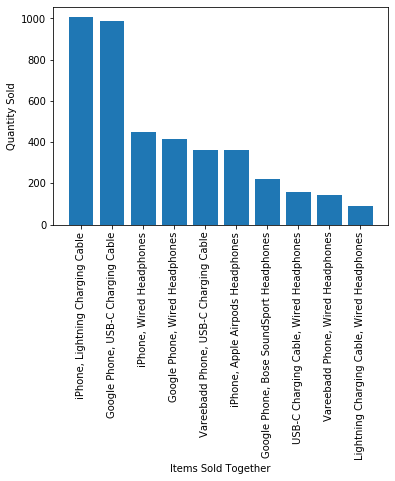

In [48]:
plt.bar(items_together, quantity)
plt.xticks(items_together, rotation = "vertical")
plt.xlabel("Items Sold Together")
plt.ylabel("Quantity Sold")
plt.show()

In [49]:
# Iphone and lightning charging cables are most often sold together 
# The company can use these results to provide better offers to customers

### Business Question 5. Which product sold the most. why do you think it sold the most?

In [50]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17,379.99,San Francisco (CA)


In [51]:
most_sold = df.groupby("Product").sum()
most_sold

,Quantity Ordered,Price Each,Month,Hour,Sales
Product,,,,,
20in Monitor,4129,451068.99,29336,58764,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,90916,2435097.56
27in FHD Monitor,7550,1125974.93,52558,107540,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,89076,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,298342,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,297332,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,223304,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,192445,1345565.43
Flatscreen TV,4819,1440000.00,34224,68815,1445700.00


In [52]:
most_sold.reset_index(inplace = True)

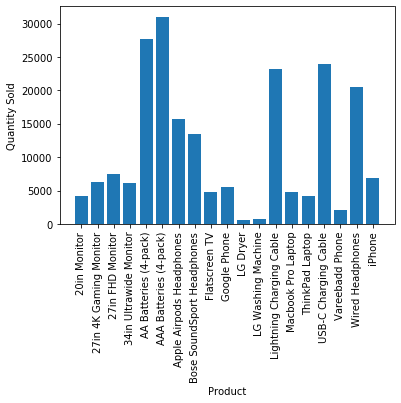

In [53]:
plt.bar(most_sold["Product"], most_sold["Quantity Ordered"])
plt.xticks(most_sold["Product"], rotation= "vertical")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.show()

In [54]:
mean_price = df.groupby("Product").mean()
mean_price

,Quantity Ordered,Price Each,Month,Hour,Sales
Product,,,,,
20in Monitor,1.006828,109.99,7.153377,14.329188,110.740968
27in 4K Gaming Monitor,1.002247,389.99,7.133226,14.593258,390.866382
27in FHD Monitor,1.005728,149.99,7.001199,14.325296,150.849141
34in Ultrawide Monitor,1.002912,379.99,7.005986,14.411260,381.096588
AA Batteries (4-pack),1.343004,3.84,7.073820,14.498809,5.157137
AAA Batteries (4-pack),1.502689,2.99,7.091226,14.404922,4.493040
Apple Airpods Headphones,1.007203,150.00,7.040774,14.361309,151.080455
Bose SoundSport Headphones,1.009906,99.99,7.062889,14.442402,100.980520
Flatscreen TV,1.003958,300.00,7.130000,14.336458,301.187500


In [55]:
mean_price.reset_index(inplace= True)

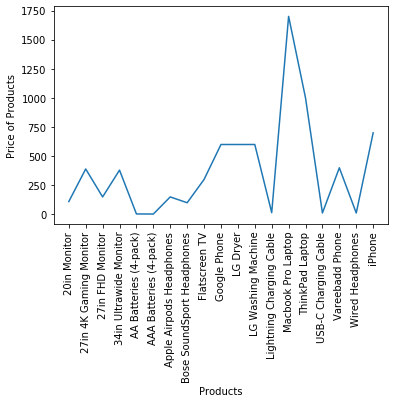

In [56]:
plt.plot(mean_price["Product"], mean_price["Price Each"])
plt.xticks(mean_price["Product"], rotation = "vertical")
plt.xlabel("Products")
plt.ylabel("Price of Products")
plt.show()

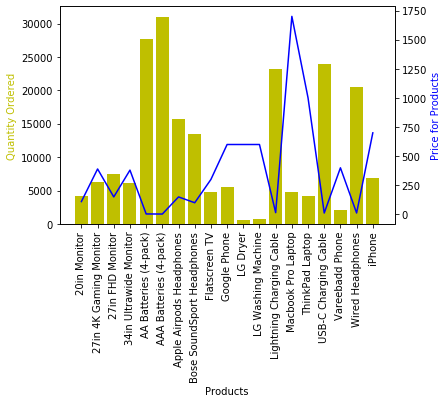

In [57]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(most_sold["Product"], most_sold["Quantity Ordered"], color = "y")
ax2.plot(mean_price["Product"], mean_price["Price Each"], color = "b")
ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered", color = "y")
ax2.set_ylabel("Price for Products", color = 'b')
ax1.set_xticklabels(mean_price["Product"], rotation = "vertical")
plt.show()

In [58]:
# AAA batteries & AA batteries sold the most, which after comparing with their respective prices tells us that,
# in general lower price products sell more than double price products. 
# and as its an electronic store, batteries are utilized in usually all the electronic appliances.